### ノック81：機械学習で予測するデータを設定しよう

In [1]:
import seaborn as sns
dataset = sns.load_dataset('titanic')
dataset

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [2]:
label = dataset.pop('survived')
label

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

### ノック82：TrainデータとTestデータに分割しよう

In [3]:
from sklearn.model_selection import train_test_split
train_ds, test_ds, train_label, test_label = train_test_split(dataset, label, random_state=2021, stratify=label)

In [4]:
train_ds

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
293,3,female,24.0,0,0,8.8500,S,Third,woman,False,NaN,Southampton,no,True
201,3,male,NaN,8,2,69.5500,S,Third,man,True,NaN,Southampton,no,False
322,2,female,30.0,0,0,12.3500,Q,Second,woman,False,NaN,Queenstown,yes,True
266,3,male,16.0,4,1,39.6875,S,Third,man,True,NaN,Southampton,no,False
540,1,female,36.0,0,2,71.0000,S,First,woman,False,B,Southampton,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,1,female,32.0,0,0,76.2917,C,First,woman,False,D,Cherbourg,yes,True
800,2,male,34.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
68,3,female,17.0,4,2,7.9250,S,Third,woman,False,NaN,Southampton,yes,False
92,1,male,46.0,1,0,61.1750,S,First,man,True,E,Southampton,no,False


In [5]:
test_ds

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
404,3,female,20.0,0,0,8.6625,S,Third,woman,False,NaN,Southampton,no,True
521,3,male,22.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
130,3,male,33.0,0,0,7.8958,C,Third,man,True,NaN,Cherbourg,no,True
14,3,female,14.0,0,0,7.8542,S,Third,child,False,NaN,Southampton,no,True
610,3,female,39.0,1,5,31.2750,S,Third,woman,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,3,male,23.0,0,0,7.8542,S,Third,man,True,NaN,Southampton,no,True
238,2,male,19.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
824,3,male,2.0,4,1,39.6875,S,Third,child,False,NaN,Southampton,no,False
486,1,female,35.0,1,0,90.0000,S,First,woman,False,C,Southampton,yes,False


### ノック83：データを機械学習に適した形式へ変換しよう

In [6]:
train_ds.drop(columns=['embark_town', 'alive'],inplace=True)
train_ds.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alone
293,3,female,24.0,0,0,8.8500,S,Third,woman,False,NaN,True
201,3,male,NaN,8,2,69.5500,S,Third,man,True,NaN,False
322,2,female,30.0,0,0,12.3500,Q,Second,woman,False,NaN,True
266,3,male,16.0,4,1,39.6875,S,Third,man,True,NaN,False
540,1,female,36.0,0,2,71.0000,S,First,woman,False,B,False


In [7]:
import pandas as pd
one_hot_encoded = pd.get_dummies(train_ds)
one_hot_encoded.head()

,pclass,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,embarked_C,...,who_child,who_man,who_woman,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
293,3,24.0,0,0,8.8500,False,True,1,0,0,...,0,0,1,0,0,0,0,0,0,0
201,3,NaN,8,2,69.5500,True,False,0,1,0,...,0,1,0,0,0,0,0,0,0,0
322,2,30.0,0,0,12.3500,False,True,1,0,0,...,0,0,1,0,0,0,0,0,0,0
266,3,16.0,4,1,39.6875,True,False,0,1,0,...,0,1,0,0,0,0,0,0,0,0
540,1,36.0,0,2,71.0000,False,False,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoded = train_ds.copy()
class_encoder = LabelEncoder()
label_encoded['class'] = class_encoder.fit_transform(label_encoded['class'])
label_encoded.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alone
293,3,female,24.0,0,0,8.8500,S,2,woman,False,NaN,True
201,3,male,NaN,8,2,69.5500,S,2,man,True,NaN,False
322,2,female,30.0,0,0,12.3500,Q,1,woman,False,NaN,True
266,3,male,16.0,4,1,39.6875,S,2,man,True,NaN,False
540,1,female,36.0,0,2,71.0000,S,0,woman,False,B,False


In [9]:
one_hot_encoded = pd.get_dummies(one_hot_encoded, columns=['pclass'])
one_hot_encoded.head()

,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,embarked_C,embarked_Q,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,pclass_1,pclass_2,pclass_3
293,24.0,0,0,8.8500,False,True,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
201,NaN,8,2,69.5500,True,False,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
322,30.0,0,0,12.3500,False,True,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
266,16.0,4,1,39.6875,True,False,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
540,36.0,0,2,71.0000,False,False,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [10]:
one_hot_encoded = one_hot_encoded.replace({True: 1, False: 0})
one_hot_encoded.head()

,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,embarked_C,embarked_Q,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,pclass_1,pclass_2,pclass_3
293,24.0,0,0,8.8500,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
201,NaN,8,2,69.5500,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
322,30.0,0,0,12.3500,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
266,16.0,4,1,39.6875,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
540,36.0,0,2,71.0000,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [11]:
train_ds = one_hot_encoded

### ノック84：外れ値の検出をしよう

In [12]:
q = train_ds.quantile([1/4, 3/4])
q1, q3 = q.loc[1/4], q.loc[3/4]
iqr = q3 - q1
mx = q3 + 1.5 * iqr
mn = q1 - 1.5 * iqr

In [13]:
((train_ds > mx) | (train_ds < mn)).sum()

age               4
sibsp            40
parch           164
fare             88
adult_male        0
alone             0
sex_female        0
sex_male          0
embarked_C      127
embarked_Q       58
embarked_S        0
class_First     164
class_Second    133
class_Third       0
who_child        64
who_man           0
who_woman         0
deck_A           11
deck_B           33
deck_C           45
deck_D           27
deck_E           24
deck_F            9
deck_G            2
pclass_1        164
pclass_2        133
pclass_3          0
dtype: int64

### ノック85：データの分布をみてスケーリング手法を考えよう

In [14]:
train_ds.describe()

,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,embarked_C,embarked_Q,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,pclass_1,pclass_2,pclass_3
count,531.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.00000,668.000000,...,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,29.694124,0.546407,0.390719,32.485822,0.600299,0.601796,0.353293,0.646707,0.19012,0.086826,...,0.016467,0.049401,0.067365,0.040419,0.035928,0.013473,0.002994,0.245509,0.199102,0.555389
std,14.569037,1.153550,0.807594,49.198142,0.490204,0.489895,0.478351,0.478351,0.39269,0.281791,...,0.127358,0.216867,0.250841,0.197088,0.186250,0.115375,0.054677,0.430711,0.399624,0.497295
min,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.250000,0.000000,0.000000,7.925000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,0.000000,0.000000,15.047900,1.000000,1.000000,0.000000,1.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,39.000000,1.000000,0.000000,31.000000,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


(array([547.,  80.,  25.,   1.,   8.,   5.,   0.,   0.,   0.,   2.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

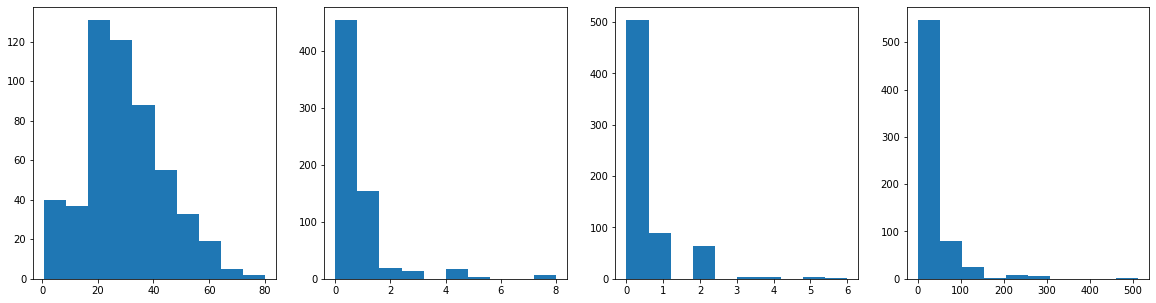

In [16]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ncols=4, figsize=(20, 5))
axes[0].hist(train_ds.age)
axes[1].hist(train_ds.sibsp)
axes[2].hist(train_ds.parch)
axes[3].hist(train_ds.fare)

In [17]:
from scipy import stats
import numpy as np
bins, bin_edges = np.histogram(train_ds.age.dropna(), bins='auto')
stat, p = stats.chisquare(bins)

In [18]:
p

3.4564391399825767e-66

In [19]:
stat, p = stats.shapiro(bins)
p

0.07798287272453308

In [21]:
bins, bin_edges = np.histogram(train_ds.sibsp.dropna(), bins='auto')
stat, p = stats.chisquare(bins)
print(p)

stat, p = stats.shapiro(bins)
print(p)

0.0
3.933027081098883e-12


In [24]:
bins, bin_edges = np.histogram(train_ds.parch.dropna(), bins='auto')
stat, p = stats.chisquare(bins)
print(p)

stat, p = stats.shapiro(bins)
print(p)

0.0
7.424870887007273e-07


In [25]:
bins, bin_edges = np.histogram(train_ds.fare.dropna(), bins='auto')
stat, p = stats.chisquare(bins)
print(p)

stat, p = stats.shapiro(bins)
print(p)

0.0
5.63639770794382e-20


### ノック86：分布に従ってスケーリングをやってみよう

In [26]:
from sklearn.preprocessing import RobustScaler, StandardScaler

age_scaler = StandardScaler()
sibsp_scaler = RobustScaler()
parch_scaler = RobustScaler()
fare_scaler = RobustScaler()

In [27]:
train_ds['age'] = age_scaler.fit_transform(train_ds['age'].values.reshape(-1, 1))
train_ds['sibsp'] = age_scaler.fit_transform(train_ds['sibsp'].values.reshape(-1, 1))
train_ds['parch'] = age_scaler.fit_transform(train_ds['parch'].values.reshape(-1, 1))
train_ds['fare'] = age_scaler.fit_transform(train_ds['fare'].values.reshape(-1, 1))

(array([547.,  80.,  25.,   1.,   8.,   5.,   0.,   0.,   0.,   2.]),
 array([-0.66080065,  0.38133851,  1.42347768,  2.46561685,  3.50775602,
         4.54989518,  5.59203435,  6.63417352,  7.67631269,  8.71845185,
         9.76059102]),
 <a list of 10 Patch objects>)

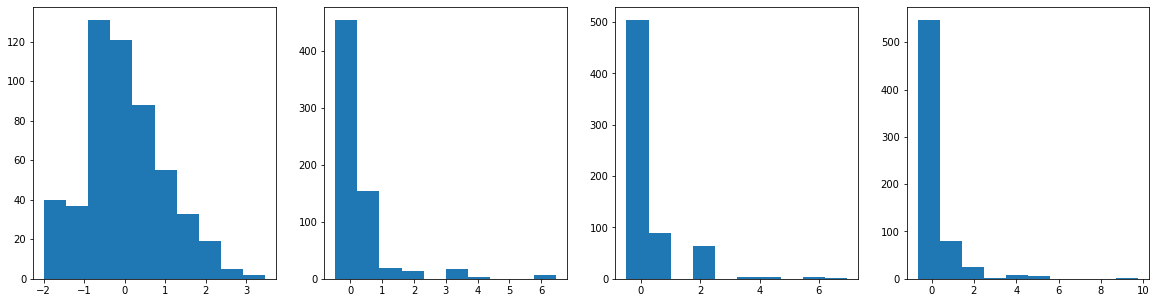

In [28]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ncols=4, figsize=(20, 5))
axes[0].hist(train_ds.age)
axes[1].hist(train_ds.sibsp)
axes[2].hist(train_ds.parch)
axes[3].hist(train_ds.fare)

### ノック87：スケーラーを保存しよう

In [29]:
cd /content/drive/MyDrive/100knock-process-visualization/chapter-7

/content/drive/MyDrive/100knock-process-visualization/chapter-7


In [30]:
import os
os.makedirs('data/scalers/', exist_ok=1)
!ls data

scalers


In [31]:
import pickle
with open('data/scalers/age_scaler.pkl', mode='wb') as f:
    pickle.dump(age_scaler, f)

!ls data/scalers/

age_scaler.pkl


In [32]:
with open('data/scalers/sibsp_scaler.pkl', mode='wb') as f:
    pickle.dump(sibsp_scaler, f)

with open('data/scalers/parch_scaler.pkl', mode='wb') as f:
    pickle.dump(parch_scaler, f)

with open('data/scalers/fare_scaler.pkl', mode='wb') as f:
    pickle.dump(fare_scaler, f)

In [33]:
with open('data/scalers/age_scaler.pkl', mode='rb') as f:
    age_scaler = pickle.load(f)

age_scaled = test_ds.copy()
age_scaled['age'] = age_scaler.transform(age_scaled['age'].values.reshape(-1, 1))
age_scaled.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
404,3,female,-0.253977,0,0,8.6625,S,Third,woman,False,NaN,Southampton,no,True
521,3,male,-0.213294,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
130,3,male,0.010459,0,0,7.8958,C,Third,man,True,NaN,Cherbourg,no,True
14,3,female,-0.376024,0,0,7.8542,S,Third,child,False,NaN,Southampton,no,True
610,3,female,0.132506,1,5,31.2750,S,Third,woman,False,NaN,Southampton,no,False


### ノック88：欠損値の処理をやってみよう

In [34]:
train_ds.isna().sum()

age             137
sibsp             0
parch             0
fare              0
adult_male        0
alone             0
sex_female        0
sex_male          0
embarked_C        0
embarked_Q        0
embarked_S        0
class_First       0
class_Second      0
class_Third       0
who_child         0
who_man           0
who_woman         0
deck_A            0
deck_B            0
deck_C            0
deck_D            0
deck_E            0
deck_F            0
deck_G            0
pclass_1          0
pclass_2          0
pclass_3          0
dtype: int64

In [36]:
from sklearn.impute import SimpleImputer

age_imputer = SimpleImputer(strategy='median')
train_ds['age'] = age_imputer.fit_transform(train_ds['age'].values.reshape(-1, 1))
train_ds

,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,embarked_C,embarked_Q,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,pclass_1,pclass_2,pclass_3
293,-0.391206,-0.474030,-0.484168,-0.480781,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
201,-0.116392,6.466283,1.994180,0.753930,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
322,0.021015,-0.474030,-0.484168,-0.409587,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
266,-0.940833,2.996127,0.755006,0.146491,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
540,0.433235,-0.474030,1.994180,0.783425,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,0.158422,-0.474030,-0.484168,0.891064,0,1,1,0,1,0,...,0,0,0,1,0,0,0,1,0,0
800,0.295828,-0.474030,-0.484168,-0.396365,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
68,-0.872130,2.996127,1.994180,-0.499597,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
92,1.120270,0.393509,-0.484168,0.583572,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0


In [37]:
train_ds.isna().sum()

age             0
sibsp           0
parch           0
fare            0
adult_male      0
alone           0
sex_female      0
sex_male        0
embarked_C      0
embarked_Q      0
embarked_S      0
class_First     0
class_Second    0
class_Third     0
who_child       0
who_man         0
who_woman       0
deck_A          0
deck_B          0
deck_C          0
deck_D          0
deck_E          0
deck_F          0
deck_G          0
pclass_1        0
pclass_2        0
pclass_3        0
dtype: int64

In [38]:
os.makedirs('data/imputers/', exist_ok=1)
with open('data/imputers/age_imputer.pkl', mode='wb') as f:
    pickle.dump(age_imputer, f)

!ls data/imputers

age_imputer.pkl


### ノック89：学習じのサンプル比率を調整しよう

In [39]:
train_label.value_counts()

0    412
1    256
Name: survived, dtype: int64

In [40]:
from imblearn import under_sampling
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=2021)
under_sampled_train_ds, under_sampled_train_label = under_sampler.fit_resample(train_ds, train_label)
under_sampled_train_ds.shape

(512, 27)

In [41]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=2021)
over_sampled_train_ds, over_sampled_train_label = over_sampler.fit_resample(train_ds, train_label)
over_sampled_train_ds.shape

(824, 27)

### ノック90：Testデータの前処理をしよう

In [42]:
test_ds.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
404,3,female,20.0,0,0,8.6625,S,Third,woman,False,NaN,Southampton,no,True
521,3,male,22.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
130,3,male,33.0,0,0,7.8958,C,Third,man,True,NaN,Cherbourg,no,True
14,3,female,14.0,0,0,7.8542,S,Third,child,False,NaN,Southampton,no,True
610,3,female,39.0,1,5,31.2750,S,Third,woman,False,NaN,Southampton,no,False


In [43]:
test_ds.drop(columns=['embark_town', 'alive'], inplace=True)

In [44]:
test_ds = pd.get_dummies(test_ds)
test_ds = pd.get_dummies(test_ds, columns=['pclass'])
test_ds.replace({True: 1, False: 0}, inplace=True)

In [45]:
test_ds = test_ds.merge(train_ds, how='left')
test_ds = test_ds[train_ds.columns]
test_ds

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/merge.py:1218: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,embarked_C,embarked_Q,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,pclass_1,pclass_2,pclass_3
0,20.0,0,0,8.6625,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,22.0,0,0,7.8958,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,33.0,0,0,7.8958,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
3,14.0,0,0,7.8542,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,39.0,1,5,31.2750,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,23.0,0,0,7.8542,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
219,19.0,0,0,10.5000,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
220,2.0,4,1,39.6875,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
221,35.0,1,0,90.0000,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [46]:
with open('data/scalers/age_scaler.pkl', mode='rb') as f:
    age_scaler = pickle.load(f)
with open('data/scalers/sibsp_scaler.pkl', mode='rb') as f:
    sibsp_scaler = pickle.load(f)
with open('data/scalers/parch_scaler.pkl', mode='rb') as f:
    parch_scaler = pickle.load(f)
with open('data/scalers/fare_scaler.pkl', mode='rb') as f:
    fare_scaler = pickle.load(f)

test_ds['age'] = age_scaler.transform(test_ds.age.values.reshape(-1, 1))
test_ds['sibsp'] = age_scaler.transform(test_ds.sibsp.values.reshape(-1, 1))
test_ds['parch'] = age_scaler.transform(test_ds.parch.values.reshape(-1, 1))
test_ds['fare'] = age_scaler.transform(test_ds.fare.values.reshape(-1, 1))

In [48]:
with open('data/imputers/age_imputer.pkl', mode='rb') as f:
    age_imputer = pickle.load(f)

test_ds['age'] = age_imputer.transform(test_ds.age.values.reshape(-1, 1))

In [49]:
test_ds

,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,embarked_C,embarked_Q,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,pclass_1,pclass_2,pclass_3
0,-0.253977,-0.660801,-0.660801,-0.484595,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-0.213294,-0.660801,-0.660801,-0.500191,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.010459,-0.660801,-0.660801,-0.500191,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.376024,-0.660801,-0.660801,-0.501037,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.132506,-0.640459,-0.559095,-0.024630,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,-0.192953,-0.660801,-0.660801,-0.501037,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
219,-0.274318,-0.660801,-0.660801,-0.447218,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
220,-0.620118,-0.579436,-0.640459,0.146491,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
221,0.051141,-0.640459,-0.660801,1.169908,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
